In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib import patches
import socket


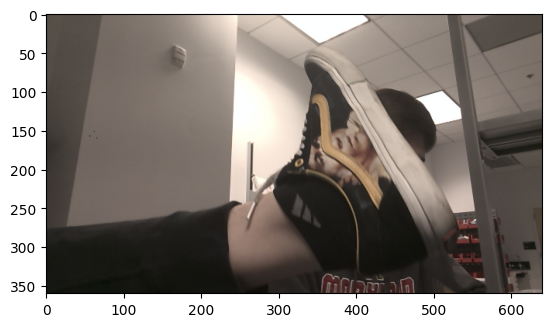

In [15]:
camera = cv.VideoCapture(0)
ret_val, img = camera.read()
del(camera)

image = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(image)

In [4]:
net = cv.dnn.readNetFromDarknet('yolov3.cfg', 'yolov3.weights')
net.setPreferableBackend(cv.dnn.DNN_BACKEND_OPENCV)

classes = open('coco.names').read().strip().split('\n')
np.random.seed(42)
colors = np.random.randint(0, 255, size=(len(classes), 3), dtype='uint8')

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\darknet\darknet_importer.cpp:217: error: (-212:Parsing error) Failed to parse NetParameter file: yolov3.weights in function 'cv::dnn::dnn4_v20230620::readNetFromDarknet'


In [17]:
ln = net.getLayerNames()
net.getUnconnectedOutLayers()
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]


In [18]:
blob = cv.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)
r = blob[0, 0, :, :]

net.setInput(blob)
outputs = net.forward(ln)

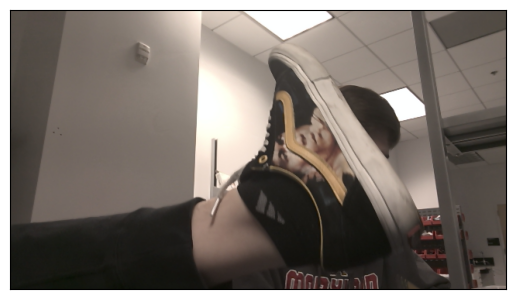

In [19]:
boxes = []
confidences = []
classIDs = []
h, w = img.shape[:2]

for output in outputs:
    for detection in output:
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]
        if confidence > 0.5:
            box = detection[:4] * np.array([w, h, w, h])
            (centerX, centerY, width, height) = box.astype("int")
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))
            box = [x, y, int(width), int(height)]
            boxes.append(box)
            confidences.append(float(confidence))
            classIDs.append(classID)

indices = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

fig, ax = plt.subplots()
plt.xticks([]);
plt.yticks([]);
ax.imshow(image)

if len(indices) > 0:
    for i in indices.flatten():
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])
        color = [int(c) for c in colors[classIDs[i]]]
        rect = patches.Rectangle((x, y), w, h, linewidth = 1, edgecolor = 'r', facecolor = 'none')
        ax.add_patch(rect)
        text = "{}: {:.4f}".format(classes[classIDs[i]], confidences[i])
        ax.text(x, y, text, bbox=dict(facecolor='r', alpha=0.5))
